# Konuşma Duygu Kestirimi



## Problem Tanımı:

Bu projenin amacı konuşmalardan duyguları tanıyabilecek bir sınıflandırıcı oluşturmaktır.

![MSURL](https://i.gifer.com/Ga43.gif "MS")


Kaynaklar:

https://github.com/Emotional-Text-to-Speech/dl-for-emo-tts

https://www.kaggle.com/code/shivamburnwal/speech-emotion-recognition/notebook

https://github.com/mkosaka1/Speech_Emotion_Recognition

https://github.com/IliaZenkov/transformer-cnn-emotion-recognition

https://www.kaggle.com/code/ejlok1/audio-emotion-part-1-explore-data/notebook

https://www.kaggle.com/code/ejlok1/audio-emotion-part-2-feature-extract

https://www.kaggle.com/code/ritzing/speech-emotion-recognition-with-cnn

Data:

https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio/code

https://www.kaggle.com/datasets/ejlok1/cremad

https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee


https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess


Gerekli Kütüphanelerin Yüklenmesi

In [ ]:
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import IPython
import IPython.display as ipd
from IPython.display import Audio

# Keras
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.layers import MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Activation
from keras.layers import Conv1D, AveragePooling1D


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# diger
import pandas as pd
import numpy as np
import sys
import json
import tensorflow as tf
from matplotlib.pyplot import specgram
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

## Verilerin Seçilmesi, Düzenlenmesi ve Birleştirilmesi

Ravdess veri setine bir göz atalım.

In [ ]:
Ravdess = "/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/RAVDESS/audio_speech_actors_01-24/"

Verinin ismi bize içeriği hakkında tüm bilgiyi veriyor.

1.   Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
2.   Vocal channel (01 = speech, 02 = song).
3.   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

4.   Emotional intensity (01 = normal, 02 = strong).

5.   Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
6.   
Repetition (01 = 1st repetition, 02 = 2nd repetition).
7.  Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

In [ ]:
# Lets play the audio 
y, sr = librosa.load('/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/RAVDESS/Actor_01/03-01-08-01-02-02-01.wav')
IPython.display.Audio(y, rate=sr)
#ipd.Audio('/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/RAVDESS/Actor_01/03-01-08-01-02-02-01.wav')

 03-01-08-01-02-02-01.wav verisi için



*   03: Sadece ses
*   01: Konuşma
*   08: Şaşırmış
*   01: Duygusal yoğunluk normal
*   02: Cümle=Köpekler kapının yanında oturuyor
*   02: Tekrar 
*   01: 1.Aktör










In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # her aktörün ses kayıtları için ayrı klasör vardı onları dışarı aktaralım
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0] #.wav kısımları atıldı
        part = part.split('-') #her ses dosyasının isimleri tek tek ayrıldı


        # 3.kısımın duyguyu temsil ettiğini biliyorduk. 3 kısımdan dosyaları ayıralım
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# tüm duyguları içeren bir df üretelim.
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# her duygunun Pathini içeren df üretelim.
path_df = pd.DataFrame(file_path, columns=['Path'])
#bu data frameleri birleştirelim.
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# Sayıların hangi duyguları temsil ettiğini tanımlayalım.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
1,calm,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
2,calm,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
3,neutral,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
4,neutral,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...


In [ ]:
SemihEnser
#3443

Emrecan — 11.04.2022
Build Your Own Walking Robot - Just Robotics: https://youtu.be/TqLc2x7h_sY
YouTube
Just Robotics India
Build Your Own Walking Robot - Just Robotics
Görsel
SunFounder Robotics Kit for Arduino: https://www.amazon.com/SunFounder-Arduino-Robotics-Programmable-Tutorial/dp/B07HF3FHFT
SunFounder Robotics Kit for Arduino , 4-DOF Dancing Sloth Programma...
Description: The newest Sloth Robot is a cute and flexible robot. Visualize programming can be utilized, people who know nothing about it can also program. You can DIY many different models and program to make a different bio-robot by controlling it do different actions. If you have several robot...
Görsel
Microbit Bipedal walking robot Teen graphic programming Diy kit: https://www.aliexpress.com/item/4000244887978.html?gatewayAdapt=glo2tur
aliexpress.com
59.68US $ |Microbit Bipedal walking robot Teen graphic programming ...
Smarter Shopping, Better Living! Aliexpress.com
Görsel
How To Make An Adorable Walking Robot with Big Shoes: https://www.youtube.com/watch?v=0SofESg-mLc
YouTube
Amr MCI
How To Make An Adorable  Walking Robot with Big Shoes
Görsel
Semihcan — 11.04.2022
semihovic
microBuzz
Semihcan — dün 21:50
#include <Servo.h>

#define echoPin 2   //sensor pinlerinin tanımlanması
#define trigPin 3
#define buzzerPin 4
Genişlet
message.txt
4 KB
Ömercan — dün 23:12
Ek dosya türü: document
IDU_RobotikRapor.docx
293.74 KB
Emrecan — dün 23:22
Görsel
Görsel
Görsel
Emrecan — bugün saat 00:07
https://www.tinkercad.com/things/4h85ltSGLfc-terrific-wolt/editel?sharecode=GZKZ7cJjTWNZpn4K8n0YYNGpbMEZXqqXm_a2hELQwkE
Tinkercad
Login | Tinkercad
Görsel
Emrecan — bugün saat 01:31
Tinkercad devre şeması
Görsel
Tinkercad devre görünümü
Görsel
#include <Servo.h>

#define echoPin 2
#define trigPin 3
#define buzzerPin 4

#define leftLeg 8
#define rightLeg 9
#define leftFoot 10
#define rightFoot 11

Servo leftLegServo, rightLegServo, leftFootServo, rightFootServo;


void motion(Servo servo, int fromAngle, int toAngle, int delay_duration = 10) {
  if (toAngle > fromAngle) {
    for (int angle = fromAngle; angle <= toAngle; angle++) {
      servo.write(angle);
      delay(delay_duration);
    }
  } else {
    for (int angle = fromAngle; angle >= toAngle; angle--) {
      servo.write(angle);
      delay(delay_duration);
    }
  }
}

void step(int legAngle = 30, int footAngle = 30, int delay_duration = 500) {

  // Sag ayak kir
  motion(rightFootServo, 90, 90 - footAngle);
  delay(delay_duration);

  // Sol bacak cevir
  motion(leftLegServo, 90 - legAngle / 2, 90 + legAngle / 2);
  delay(delay_duration);

  // Sag bacak hazirla
  motion(rightLegServo, 90 + legAngle / 2, 90 - legAngle / 2);
  delay(delay_duration);

  // Sag ayak duzelt
  motion(rightFootServo, 90 - footAngle, 90);
  delay(delay_duration);

  // Sol ayak kir
  motion(leftFootServo, 90, 90 - footAngle);
  delay(delay_duration);

  // Sag bacak cevir
  motion(rightLegServo, 90 - legAngle / 2, 90 + legAngle / 2);
  delay(delay_duration);

  // Sol bacak hazirla
  motion(leftLegServo, 90 + legAngle / 2, 90 - legAngle / 2);
  delay(delay_duration);

  // Sol ayak duzelt
  motion(leftFootServo, 90 - footAngle, 90);
  delay(delay_duration);
}

void turn(){
    // Sol ayak cevir
    motion(leftFootServo, 90, 60);
    delay(1000);
    // Sag bacak ile don
    motion(rightLegServo, 120, 30);
    delay(1000);
    // Sol ayak duzelt
    motion(leftFootServo, 60, 90);
    delay(1000);
    // Sag ayak cevir
    motion(rightFootServo, 90, 60);
    delay(1000);
    // Sag bacak duzelt
    motion(rightLegServo, 30, 120);
    delay(1000);
    // Sag ayak duzelt
    motion(rightFootServo, 60, 90);
    delay(1000);
}

int get_distance() {

  long duration; // variable for the duration of sound wave travel
  int distance; // variable for the distance measurement

  // Clears the trigPin condition
  digitalWrite(trigPin, LOW);
  delayMicroseconds(2);
  // Sets the trigPin HIGH (ACTIVE) for 10 microseconds
  digitalWrite(trigPin, HIGH);
  delayMicroseconds(10);
  digitalWrite(trigPin, LOW);
  // Reads the echoPin, returns the sound wave travel time in microseconds
  duration = pulseIn(echoPin, HIGH);
  // Calculating the distance
  distance = duration * 0.034 / 2; // Speed of sound wave divided by 2 (go and back)
... (29 satır kaldı)
Daralt
tinkercad_code.txt
4 KB
﻿
#include <Servo.h>

#define echoPin 2
#define trigPin 3
#define buzzerPin 4

#define leftLeg 8
#define rightLeg 9
#define leftFoot 10
#define rightFoot 11

Servo leftLegServo, rightLegServo, leftFootServo, rightFootServo;


void motion(Servo servo, int fromAngle, int toAngle, int delay_duration = 10) {
  if (toAngle > fromAngle) {
    for (int angle = fromAngle; angle <= toAngle; angle++) {
      servo.write(angle);
      delay(delay_duration);
    }
  } else {
    for (int angle = fromAngle; angle >= toAngle; angle--) {
      servo.write(angle);
      delay(delay_duration);
    }
  }
}

void step(int legAngle = 30, int footAngle = 30, int delay_duration = 500) {

  // Sag ayak kir
  motion(rightFootServo, 90, 90 - footAngle);
  delay(delay_duration);

  // Sol bacak cevir
  motion(leftLegServo, 90 - legAngle / 2, 90 + legAngle / 2);
  delay(delay_duration);

  // Sag bacak hazirla
  motion(rightLegServo, 90 + legAngle / 2, 90 - legAngle / 2);
  delay(delay_duration);

  // Sag ayak duzelt
  motion(rightFootServo, 90 - footAngle, 90);
  delay(delay_duration);

  // Sol ayak kir
  motion(leftFootServo, 90, 90 - footAngle);
  delay(delay_duration);

  // Sag bacak cevir
  motion(rightLegServo, 90 - legAngle / 2, 90 + legAngle / 2);
  delay(delay_duration);

  // Sol bacak hazirla
  motion(leftLegServo, 90 + legAngle / 2, 90 - legAngle / 2);
  delay(delay_duration);

  // Sol ayak duzelt
  motion(leftFootServo, 90 - footAngle, 90);
  delay(delay_duration);
}

void turn(){
    // Sol ayak cevir
    motion(leftFootServo, 90, 60);
    delay(1000);
    // Sag bacak ile don
    motion(rightLegServo, 120, 30);
    delay(1000);
    // Sol ayak duzelt
    motion(leftFootServo, 60, 90);
    delay(1000);
    // Sag ayak cevir
    motion(rightFootServo, 90, 60);
    delay(1000);
    // Sag bacak duzelt
    motion(rightLegServo, 30, 120);
    delay(1000);
    // Sag ayak duzelt
    motion(rightFootServo, 60, 90);
    delay(1000);
}

int get_distance() {

  long duration; // variable for the duration of sound wave travel
  int distance; // variable for the distance measurement

  // Clears the trigPin condition
  digitalWrite(trigPin, LOW);
  delayMicroseconds(2);
  // Sets the trigPin HIGH (ACTIVE) for 10 microseconds
  digitalWrite(trigPin, HIGH);
  delayMicroseconds(10);
  digitalWrite(trigPin, LOW);
  // Reads the echoPin, returns the sound wave travel time in microseconds
  duration = pulseIn(echoPin, HIGH);
  // Calculating the distance
  distance = duration * 0.034 / 2; // Speed of sound wave divided by 2 (go and back)
  return distance;
}

void setup() {
  Serial.begin(9600);

  leftLegServo.attach(leftLeg);
  rightLegServo.attach(rightLeg);
  leftFootServo.attach(leftFoot);
  rightFootServo.attach(rightFoot);

  pinMode(trigPin, OUTPUT);
  pinMode(echoPin, INPUT);
  pinMode(buzzerPin, OUTPUT);
}

void loop() {
  int distance = get_distance();
  Serial.println(distance);
  if (distance <= 10) {
    digitalWrite(buzzerPin, HIGH);
    delay(1000);
    digitalWrite(buzzerPin, LOW);
    delay(2000);
    step(-30);
  } else {
    step(30);
  }
}
tinkercad_code.txt
4 KB

Yapılan işlemleri tüm veri setleri için tekrarlayalım. 

Bunun sonucunda her duyguyu tüm veri setlerinden derleyip birleştirmiş olacağız.

Crema

In [ ]:
Crema = "/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/CREMA-D/AudioWAV/"

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,fear,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
1,happy,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
2,neutral,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
3,happy,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
4,sad,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...


Tess

In [ ]:
Tess = "/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/TESS/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,fear,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
1,fear,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
2,fear,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
3,fear,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
4,fear,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...


Save

In [ ]:
Savee = "/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/SAVEE/ALL/"

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
1,angry,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
2,angry,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
3,angry,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
4,angry,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...


Tüm Veri setlerini birleştirelim.

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,calm,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
1,calm,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
2,calm,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
3,neutral,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
4,neutral,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...


## Verilerin Cinsiyete Göre Seçilmesi, Düzenlenmesi ve Birleştirilmesi

In [ ]:
# Get the data location for SAVEE
dir_list = os.listdir(Savee)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(Savee + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_angry        60
male_disgust      60
male_fear         60
male_happy        60
male_sad          60
male_surprise     60
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(Ravdess)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(Ravdess + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(Ravdess + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_sad            96
male_happy          96
male_fear           96
male_angry          96
male_disgust        96
male_surprise       96
female_happy        96
female_angry        96
female_fear         96
female_sad          96
female_surprise     96
female_disgust      96
Name: labels, dtype: int64

In [ ]:
path = []
emotion = []
#TESS="/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/TESS/TESS Toronto emotional speech set data/"
dir_list = os.listdir(Tess)
dir_list.sort()
for i in dir_list:
    fname2 = os.listdir(Tess + i)
    for f in fname2:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(Tess + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_fear        400
female_surprise    400
female_sad         400
female_angry       400
female_disgust     400
female_happy       400
female_neutral     400
Name: labels, dtype: int64

In [ ]:
dir_list = os.listdir(Crema)
dir_list.sort()
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(Crema + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_angry        671
male_disgust      671
male_fear         671
male_happy        671
male_sad          671
female_angry      600
female_disgust    600
female_fear       600
female_happy      600
female_sad        600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

In [ ]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.head()
df.to_csv("Data_path2.csv",index=False)

female_happy       1096
female_angry       1096
female_fear        1096
female_sad         1096
female_disgust     1096
female_neutral     1056
male_neutral        839
male_angry          827
male_disgust        827
male_fear           827
male_happy          827
male_sad            827
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


## Veri Hakkında Önceden Bilgi Edinmek İçin Görselleştirmelere Başlayalım.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


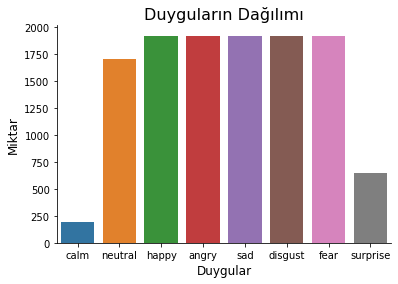

In [ ]:
plt.title('Duyguların Dağılımı', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Miktar', size=12)
plt.xlabel('Duygular', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

Waveplot ve Spektogram için gerekli fonksiyonların tanımlanası

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

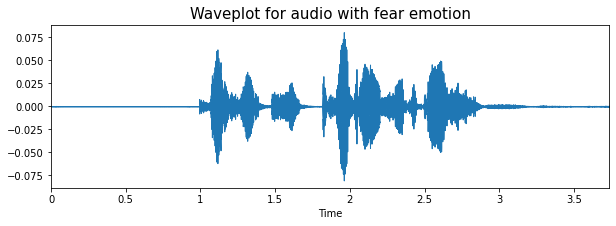

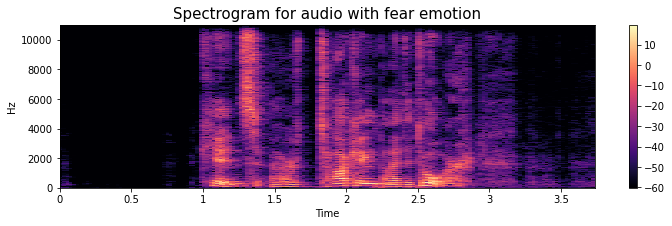

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[4] #girilen duyguyu içeren herhangi bir dosyanın alınması
data, sampling_rate = librosa.load(path)#librosa ile ses dosyası ve örnekleme frek. bilgisi yüklenmesi

create_waveplot(data, sampling_rate, emotion) #dalga görünüm
create_spectrogram(data, sampling_rate, emotion)#spektogram
Audio(path)#ses dosyasının oynatılması

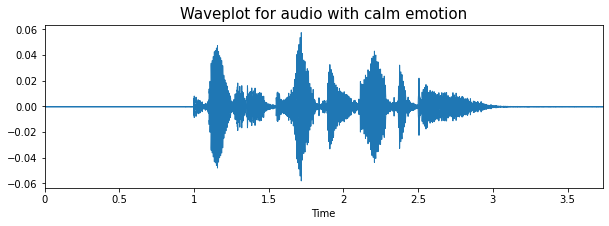

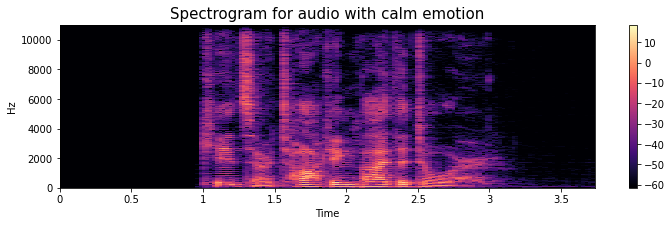

In [ ]:
emotion='calm'
path = np.array(data_path.Path[data_path.Emotions==emotion])[4] #girilen duyguyu içeren herhangi bir şarkının alınması
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

## Öznitelik Çıkarımı

MFCC(Mel-Frequency Cepstral Coefficients): 

Ses sinyalinin kısa zamanlı güç spektrumunun Mel ölçeği üzerindeki ifadesidir. (Mel frekans ölçeği, insan kulağının ses frekanslarındaki değişimi algılayışını gösteren bir ölçektir.)

Her bir bandın mfcc ortalamasını çizdirip işler basitleştirilebilir mi diye bakalım. Her bir band verideki ses dosyasının mfcc satırını temsil eder.

216
216


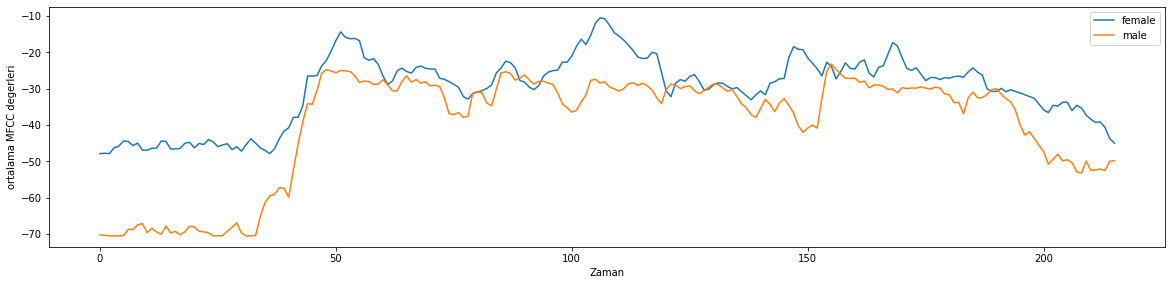

In [ ]:
# Ravdess veriseti; cinsiyet=kadın; duygu=kızgın 
path = "/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Ravdess veriseti; cinsiyet=erkek; duygu=kızgın 
path = "/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isleme_Veri/RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.xlabel('Zaman')
plt.ylabel('ortalama MFCC degerleri')

plt.legend()

Aynı cümle için kadınlar ve erkekler arasında gözle görülebilen bir fark var.Demek oluyor mfcc katsayılarının ortalamalarını cinsiyetsel duygu analizinde öznitelik olarak kullanabilirim.

In [ ]:
ref = pd.read_csv("/content/Data_path2.csv")
ref.head()

,labels,source,path
0,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
1,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
2,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
3,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...
4,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...


In [ ]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

#bu dongu tum verisetinden öznitelik çıkarmaktadır.
counter=0
for index,path in enumerate(ref.path): #her konuşma verisi enumerate fonksiyonu ile numaralandırıldı.
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 ) # offset=gecikme sürei, res_type=resampling turu
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs] #loc icine yazılan özniteliğin df'deki değerlerini verir.
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

12162


,feature
0,"[-11.113934, -7.2157545, -6.21919, -5.9265437,..."
1,"[-25.000114, -24.520256, -24.178183, -23.84745..."
2,"[-1.5298388, -4.3334365, -12.285237, -13.08302..."
3,"[-24.44983, -22.465742, -22.928043, -23.243807..."
4,"[-10.492441, -6.030408, -5.494316, -5.352929, ..."


In [ ]:
# Ortalaması alınmış bantların herbirini ayrı sütünlara çıakrtıp öznitelik olarak kullanalım.
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-11.113934,-7.215755,-6.219190,-5.926544,-5.850419,-4.808961,-2.513002,...,-4.088853,-5.023864,-5.254714,-5.234093,-5.310308,-5.621666,-6.072196,-6.611347,-2.509089,1.964607
1,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-1.529839,-4.333436,-12.285237,-13.083024,-12.041326,-11.819769,-9.414148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-24.449829,-22.465742,-22.928043,-23.243807,-22.926605,-23.432240,-14.830002,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530264,-25.457796
4,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-10.492441,-6.030408,-5.494316,-5.352929,-6.210199,-6.461510,-7.450276,...,-28.025858,-23.196281,-22.263863,-19.068617,-17.662853,-16.129284,-14.389045,-14.703968,-8.982589,-4.305837


In [ ]:
df=df.fillna(0)
print(df.shape)
df[:5]

(12162, 219)


,labels,source,path,0,1,2,3,4,5,6,...,206,207,208,209,210,211,212,213,214,215
0,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-11.113934,-7.215755,-6.219190,-5.926544,-5.850419,-4.808961,-2.513002,...,-4.088853,-5.023864,-5.254714,-5.234093,-5.310308,-5.621666,-6.072196,-6.611347,-2.509089,1.964607
1,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-25.000114,-24.520256,-24.178183,-23.847450,-15.182783,-10.732485,-8.681472,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-1.529839,-4.333436,-12.285237,-13.083024,-12.041326,-11.819769,-9.414148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-24.449829,-22.465742,-22.928043,-23.243807,-22.926605,-23.432240,-14.830002,...,-22.627258,-22.633406,-22.511597,-24.300154,-24.496809,-22.895985,-23.511503,-24.342152,-24.530264,-25.457796
4,male_angry,SAVEE,/content/drive/MyDrive/Ders_Arsivi/Sinyal_Isle...,-10.492441,-6.030408,-5.494316,-5.352929,-6.210199,-6.461510,-7.450276,...,-28.025858,-23.196281,-22.263863,-19.068617,-17.662853,-16.129284,-14.389045,-14.703968,-8.982589,-4.305837


In [ ]:
# %75 train olacak şekilde veriyi bölelim. 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,-18.611181,-17.616535,-18.411484,-18.987421,-17.404621,-16.747272,-17.733749,-18.055027,-17.931210,-15.913172,...,-22.899403,-21.647814,-19.758650,-18.879402,-19.397379,-20.171659,-22.689241,-24.612816,-24.153774,-22.703135
3860,-16.242910,-19.214523,-19.195898,-16.603941,-16.234030,-17.299032,-18.321144,-17.616722,-16.793913,-18.892361,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9761,-1.533946,-4.030604,-9.614023,-12.045175,-9.992991,-11.926253,-14.008464,-13.561556,-14.024568,-15.151946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7620,-4.531078,-3.933793,-4.567834,-5.871509,-5.282474,-6.490458,-8.156469,-9.188803,-8.681726,-8.212408,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11586,-20.621704,-21.587505,-20.563646,-20.703461,-21.205717,-18.608528,-18.446669,-16.211843,-14.257651,-15.160404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7914,-17.514992,-18.551868,-17.043013,-16.977905,-19.369631,-19.562126,-22.008749,-20.178379,-17.989595,-19.336285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9513,-18.740368,-18.824934,-16.149492,-16.963453,-18.229979,-18.183958,-19.274342,-18.395124,-16.951286,-16.672031,...,-17.882132,-19.390713,-17.779474,-19.165974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5835,-19.066853,-18.328382,-17.710285,-18.043194,-18.252481,-18.710625,-16.626354,-17.831005,-18.028345,-17.859104,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5389,-20.760588,-20.047140,-18.961346,-19.468687,-19.316296,-18.162565,-18.102333,-19.914131,-20.931385,-19.215492,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11222,-18.252928,-17.727369,-19.222475,-18.469973,-17.572327,-17.850542,-17.932026,-20.588900,-18.612183,-15.990725,...,-18.065437,-18.135088,-19.665306,-20.741905,-20.273033,-18.371031,-15.576725,-17.512487,-17.008547,-18.195280


In [ ]:
# Data normalization, farklı kaynaklardan veriler toplanıldığı için kritik.
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
4950,0.186702,0.302830,0.436931,0.387795,0.497472,0.541414,0.460714,0.432024,0.434913,0.579016,...,-0.879181,-0.811623,-0.690930,-0.629882,-0.676678,-0.719747,-0.863658,-0.988705,-0.971117,-0.880165
3860,0.351275,0.187469,0.379064,0.563202,0.583460,0.500883,0.417648,0.464108,0.518117,0.361103,...,0.539296,0.525561,0.525094,0.525800,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
9761,1.373414,1.283621,1.085925,0.898693,1.041905,0.895561,0.733838,0.760940,0.720721,0.634697,...,0.539296,0.525561,0.525094,0.525800,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
7620,1.165141,1.290610,1.458186,1.353030,1.387924,1.294869,1.162884,1.081020,1.111599,1.142292,...,0.539296,0.525561,0.525094,0.525800,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
11586,0.046989,0.016160,0.278164,0.261507,0.218256,0.404688,0.408445,0.566943,0.703668,0.634078,...,0.539296,0.525561,0.525094,0.525800,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
7914,0.262877,0.235307,0.537884,0.535681,0.353129,0.334638,0.147287,0.276598,0.430642,0.328632,...,0.539296,0.525561,0.525094,0.525800,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
9513,0.177724,0.215594,0.603799,0.536744,0.436844,0.435877,0.347763,0.407130,0.506604,0.523509,...,-0.568392,-0.672202,-0.569123,-0.647424,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
5835,0.155037,0.251441,0.488659,0.457283,0.435191,0.397188,0.541904,0.448422,0.427807,0.436681,...,0.539296,0.525561,0.525094,0.525800,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
5389,0.037337,0.127361,0.396367,0.352378,0.357047,0.437448,0.433691,0.295940,0.215422,0.337467,...,0.539296,0.525561,0.525094,0.525800,0.510949,0.510890,0.511608,0.499978,0.495021,0.490722
11222,0.211597,0.294829,0.377103,0.425876,0.485153,0.460369,0.446177,0.246548,0.385094,0.573344,...,-0.579747,-0.594642,-0.685185,-0.743893,-0.730291,-0.609894,-0.432546,-0.559249,-0.537400,-0.607967


In [ ]:
# Kerasla kullanmak için veriler numpy array'a çevrildi.
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# kategorik verilerin sayısal verilere çevrilmesi(label-endocing)
lb = LabelEncoder()
y_train = keras.utils.np_utils.to_categorical(lb.fit_transform(y_train))
y_test = keras.utils.np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)

(9121, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [ ]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

CNN'de kullanabilmek için işlevsiz 3.boyut eklendi.

In [ ]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9121, 216, 1)

## Modelin Oluşturulması

Kendi kurduğumuz modelin cinsiyetler ayrılarak oluşturulan verisetiyle eğitilmesi.

In [ ]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1]'ile sutun sayısına ulaşıldı.
model.add(Activation('relu'))

model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))

model.add(Conv1D(64, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))

model.add(Conv1D(32, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())

model.add(Dense(14)) # Son ''dense'' ulaşılacak sınıf sayısını göstermelidir. 
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          2304      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 128)          262272    
                                                                 
 activation_1 (Activation)   (None, 216, 128)          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 216, 64)           65600     
                                                                 
 batch_normalization (BatchN  (None, 216, 64)          256       
 ormalization)                                                   
                                                        

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
143/143 [==============================] - 103s 713ms/step - loss: 2.1351 - accuracy: 0.2585 - val_loss: 2.1609 - val_accuracy: 0.2516
Epoch 2/50
143/143 [==============================] - 99s 693ms/step - loss: 1.9117 - accuracy: 0.3358 - val_loss: 1.9733 - val_accuracy: 0.3150
Epoch 3/50
143/143 [==============================] - 99s 695ms/step - loss: 1.8249 - accuracy: 0.3702 - val_loss: 1.8851 - val_accuracy: 0.3390
Epoch 4/50
143/143 [==============================] - 98s 683ms/step - loss: 1.7508 - accuracy: 0.3903 - val_loss: 1.8000 - val_accuracy: 0.3798
Epoch 5/50
143/143 [==============================] - 98s 683ms/step - loss: 1.7017 - accuracy: 0.4034 - val_loss: 1.7852 - val_accuracy: 0.3844
Epoch 6/50
143/143 [==============================] - 101s 708ms/step - loss: 1.6584 - accuracy: 0.4189 - val_loss: 1.7590 - val_accuracy: 0.3900
Epoch 7/50
143/143 [==============================] - 99s 693ms/step - loss: 1.6275 - accuracy: 0.4358 - val_loss: 1.7259 - val_

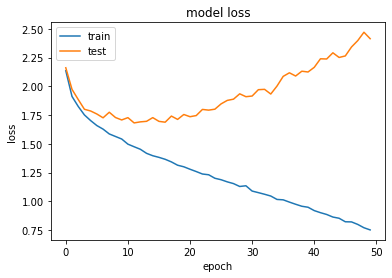

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

191/191 [==============================] - 8s 43ms/step


array([4, 3, 7, ..., 0, 3, 5])

In [ ]:
# tahmin degerleri
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Gercek degerler
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# 2 grubu tek df'de birleştirilmesi
finaldf = actual.join(preds)
finaldf[170:180]

,actualvalues,predictedvalues
170,male_sad,female_disgust
171,female_neutral,female_fear
172,male_angry,male_happy
173,female_disgust,female_disgust
174,male_angry,male_angry
175,female_fear,female_happy
176,male_sad,male_sad
177,female_fear,female_fear
178,female_happy,female_neutral
179,female_neutral,female_neutral


Başka bir modelin cinsiyetler ayrılarak oluşturulan verisetiyle eğitilmesi.

In [ ]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=14, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 108, 256)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 108, 256)          327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 54, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 54, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 27, 128)          0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/50
143/143 [==============================] - 83s 569ms/step - loss: 2.4626 - accuracy: 0.1392 - val_loss: 2.3129 - val_accuracy: 0.1848 - lr: 0.0010
Epoch 2/50
143/143 [==============================] - 82s 575ms/step - loss: 2.3129 - accuracy: 0.1867 - val_loss: 2.1972 - val_accuracy: 0.2216 - lr: 0.0010
Epoch 3/50
143/143 [==============================] - 80s 559ms/step - loss: 2.2247 - accuracy: 0.2131 - val_loss: 2.1081 - val_accuracy: 0.2460 - lr: 0.0010
Epoch 4/50
143/143 [==============================] - 80s 560ms/step - loss: 2.1692 - accuracy: 0.2295 - val_loss: 2.1401 - val_accuracy: 0.2726 - lr: 0.0010
Epoch 5/50
143/143 [==============================] - 80s 561ms/step - loss: 2.1164 - accuracy: 0.2441 - val_loss: 2.0084 - val_accuracy: 0.3006 - lr: 0.0010
Epoch 6/50
143/143 [==============================] - 82s 571ms/step - loss: 2.0668 - accuracy: 0.2603 - val_loss: 1.9497 - val_accuracy: 0.3239 - lr: 0.0010
Epoch 7/50
143/143 [==============================] 

A) 1.modelin **cinsiyetler ayrılarak** oluşturulan verisetiyle 10epoch eğitilmesi: %44.22 acc

B) 2.modelin **cinsiyetler ayrılarak** oluşturulan verisetiyle 10epoch eğitilmesi: %37.39 acc

C) 2.modelin **cinsiyetler ayrılmadan** oluşturulan verisetiyle 10epoch eğitilmesi: %40.39 acc

D) 2.modelin **cinsiyetler ayrılmadan** oluşturulan verisetiyle 50epoch eğitilmesi: %60.39 acc

E) 1.modelin **cinsiyetler ayrılarak** oluşturulan verisetiyle 50epoch eğitilmesi: %74.22 acc ******************************* 

F) 2.modelin **cinsiyetler ayrılarak** oluşturulan verisetiyle 50epoch eğitilmesi: %44 acc


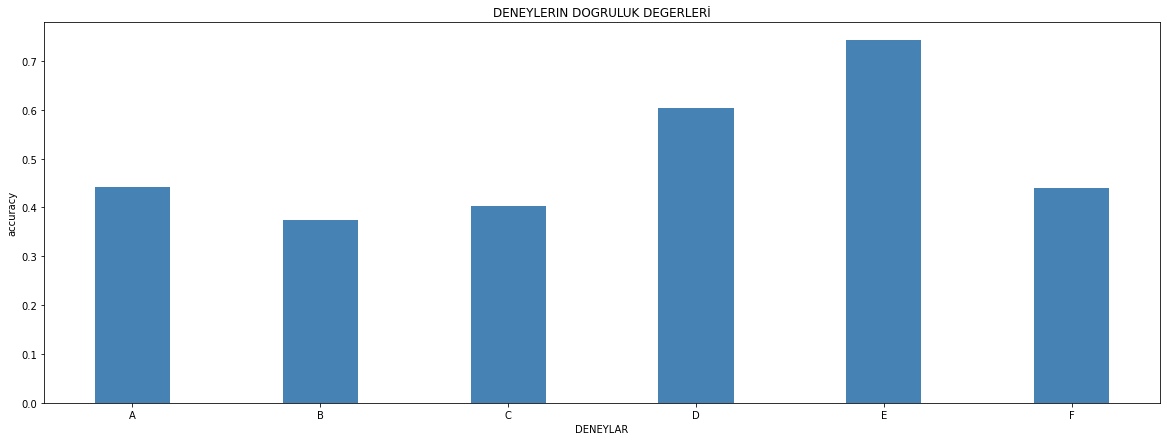

In [ ]:
data = {'A':0.4422,
        'B':0.3739,
        'C':0.4039,
        'D':0.6039,
        'E':0.7422,
        'F':0.44,}

batch_size = list(data.keys())
acc = list(data.values())
fig = plt.figure(figsize = (20, 7))
 
# creating the bar plot
plt.bar(batch_size, acc, color ='steelblue',
        width = 0.4)
 
plt.xlabel("DENEYLAR")
plt.ylabel("accuracy")
plt.title("DENEYLERIN DOGRULUK DEGERLERİ")
plt.show()

Soru: Data Normalization Nedir ve Neden Kullanılır?

Cevap:

Data Normalization veriyi istenen belli bir aralığa çekme işlemidir.
Veri başka kaynaklardan toplandıysa veya verideki değerler arasında oransal büyük bir farklılıklar varsa bu işlem gerçekleştirilir.